CASE STUDY : ANALISIS PASIEN

Mr. Lee adalah seorang data analyst di sebuah start-up di bidang medis. Dia ditugaskan oleh Market Research untuk menganalisis data pasien di beberapa rumah sakit dari tahun 2018-2023.

Bantu Mr. Lee dalam membuat visualisasi analisis data.

# Business Understanding

In [ ]:
'''
Import Modul
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet, HuberRegressor, RANSACRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Data Undertanding

Penjelasan data lebih lengkap:
https://www.kaggle.com/datasets/prasad22/healthcare-dataset


In [ ]:
df = pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [ ]:
df.shape

(10000, 15)

In [ ]:
df.describe(include='all')

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,10000,10000.000000,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,10000,10000
unique,9378,NaN,2,8,6,1815,9416,8639,5,NaN,NaN,3,1834,5,3
top,Michael Johnson,NaN,Female,AB-,Asthma,2019-04-12,Michael Johnson,Smith PLC,Cigna,NaN,NaN,Urgent,2021-11-28,Penicillin,Abnormal
freq,7,NaN,5075,1275,1708,15,7,19,2040,NaN,NaN,3391,14,2079,3456
mean,NaN,51.452200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25516.806778,300.082000,NaN,NaN,NaN,NaN
std,NaN,19.588974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14067.292709,115.806027,NaN,NaN,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.180837,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13506.523967,199.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25258.112566,299.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37733.913727,400.000000,NaN,NaN,NaN,NaN


In [ ]:
'''
Data Numerikal
'''

num_df = df.select_dtypes(include=['int64', 'float64'])
num_df.head()

,Age,Billing Amount,Room Number
0,81,37490.983364,146
1,35,47304.064845,404
2,61,36874.896997,292
3,49,23303.322092,480
4,51,18086.344184,477


In [ ]:
'''
Data kategorikal
'''

cat_df = df.drop(num_df, axis = 1)
cat_df.head()

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,Urgent,2021-08-02,Paracetamol,Normal


In [ ]:
def check_values(df):
    data = []
    for col in df.columns:
        data.append([col, \
                  df[col].dtype, \
                  df[col].isna().sum(), \
                  round(100*(df[col].isna().sum()/len(df)), 2), \
                  df[col].nunique(), \
                  df[col].unique()
                  ])

    return pd.DataFrame(columns=['kolom', 'dataType', 'null', 'nullPercentage', 'unique', 'values'], data=data)

In [ ]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [ ]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], format = '%Y-%m-%d')
df['Year'] = df['Date of Admission'].dt.year
df['Month'] = df['Date of Admission'].dt.month

# Dokumentasi
# https://docs.python.org/3/library/datetime.html

In [ ]:
check_values(df)

,kolom,dataType,null,nullPercentage,unique,values
0,Name,object,0,0.0,9378,"[Tiffany Ramirez, Ruben Burns, Chad Byrd, Anto..."
1,Age,int64,0,0.0,68,"[81, 35, 61, 49, 51, 41, 82, 55, 33, 39, 45, 2..."
2,Gender,object,0,0.0,2,"[Female, Male]"
3,Blood Type,object,0,0.0,8,"[O-, O+, B-, AB+, A+, AB-, A-, B+]"
4,Medical Condition,object,0,0.0,6,"[Diabetes, Asthma, Obesity, Arthritis, Hyperte..."
5,Date of Admission,datetime64[ns],0,0.0,1815,"[2022-11-17T00:00:00.000000000, 2023-06-01T00:..."
6,Doctor,object,0,0.0,9416,"[Patrick Parker, Diane Jackson, Paul Baker, Br..."
7,Hospital,object,0,0.0,8639,"[Wallace-Hamilton, Burke, Griffin and Cooper, ..."
8,Insurance Provider,object,0,0.0,5,"[Medicare, UnitedHealthcare, Aetna, Cigna, Blu..."
9,Billing Amount,float64,0,0.0,10000,"[37490.98336352819, 47304.06484547511, 36874.8..."


In [ ]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Year', 'Month'],
      dtype='object')

# EDA

In [ ]:
df_top_10 = df.sort_values('Billing Amount', ascending=False).head(10)
df_top_10

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Year,Month
8789,Daniel Hall,77,Male,A+,Hypertension,2018-12-04,Timothy Serrano,Arellano-Mahoney,Aetna,49995.902283,196,Emergency,2018-12-11,Paracetamol,Abnormal,2018,12
9384,Teresa Buchanan,75,Male,B+,Cancer,2020-11-22,Joseph Rice,Ellison-Johnson,UnitedHealthcare,49994.984740,296,Urgent,2020-11-28,Aspirin,Inconclusive,2020,11
3256,Roy Beck,79,Female,A-,Arthritis,2020-11-05,Aaron Mills,"Thompson, Carlson and Kim",Medicare,49985.973068,483,Elective,2020-11-12,Paracetamol,Inconclusive,2020,11
734,Mary Stein,35,Male,A+,Hypertension,2020-12-07,Alice Gross DVM,"Morales, Ferrell and Clark",Medicare,49974.806592,390,Emergency,2020-12-28,Lipitor,Normal,2020,12
3526,Richard Jones,59,Female,A+,Asthma,2020-05-16,Rebecca Parks,"Smith, Cooper and Chavez",Aetna,49974.299138,242,Emergency,2020-05-31,Aspirin,Abnormal,2020,5
1495,Holly Clayton,43,Male,O-,Obesity,2021-11-30,Zachary Castaneda,"Webster, Oconnell and Norton",Medicare,49974.160458,441,Emergency,2021-12-16,Penicillin,Abnormal,2021,11
4110,Jason Miller,74,Male,B-,Cancer,2019-01-01,Matthew Lewis,"Ford, Gibson and Parker",Blue Cross,49957.997600,292,Emergency,2019-01-29,Ibuprofen,Inconclusive,2019,1
7447,John Oneill,31,Male,AB-,Diabetes,2019-08-16,Travis Gibbs,Dunn Ltd,Aetna,49954.968325,455,Emergency,2019-09-03,Paracetamol,Abnormal,2019,8
5169,Elizabeth Johnson,50,Female,A-,Hypertension,2022-07-10,Dawn Haley,"Sanders, Robertson and Williams",Medicare,49951.261761,476,Emergency,2022-08-06,Aspirin,Inconclusive,2022,7
7289,Robert Potts,67,Female,A-,Obesity,2019-01-17,William Wilson,Harmon-Anderson,Blue Cross,49947.562815,154,Emergency,2019-01-19,Aspirin,Inconclusive,2019,1


## Comparison

In [ ]:
# Dokumentasi color:
# https://matplotlib.org/stable/users/explain/colors/colormaps.html

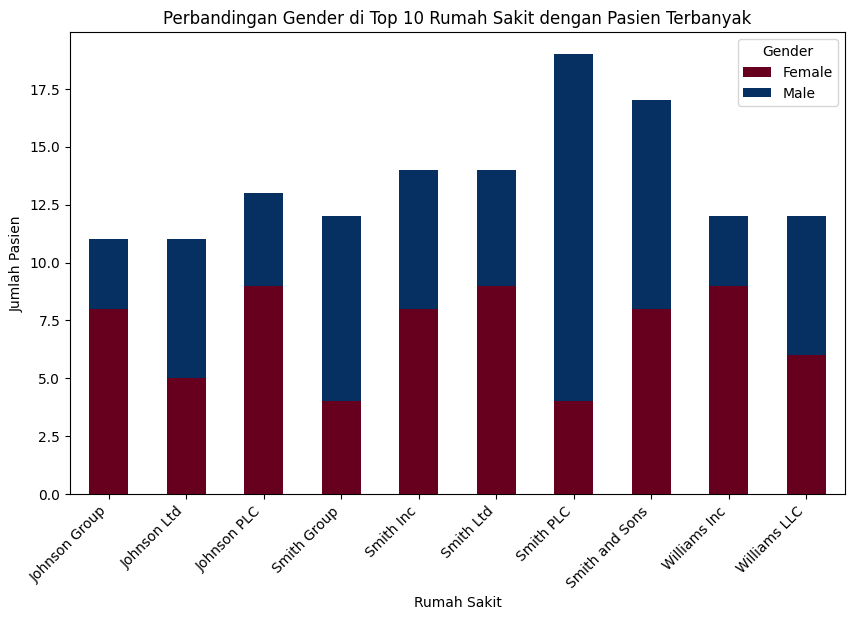

In [ ]:
'''
Bar Chart
'''

# Menghitung jumlah pasien di setiap rumah sakit
jumlah_pasien_per_rumah_sakit = df['Hospital'].value_counts()

# Memilih top 10 rumah sakit dengan pasien terbanyak
top_rumah_sakit = jumlah_pasien_per_rumah_sakit.head(10)

# Filter data hanya untuk top 10 rumah sakit
df_top10 = df[df['Hospital'].isin(top_rumah_sakit.index)]

# Menghitung jumlah pasien per gender di top 10 rumah sakit
jumlah_pasien_per_gender = df_top10.groupby(['Hospital', 'Gender']).size().unstack()

# Membuat stacked bar plot menggunakan .plot
jumlah_pasien_per_gender.plot(kind='bar', stacked=True, colormap='RdBu', figsize=(10, 6))
plt.title('Perbandingan Gender di Top 10 Rumah Sakit dengan Pasien Terbanyak')
plt.xlabel('Rumah Sakit')
plt.ylabel('Jumlah Pasien')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=45, ha='right')  # Untuk memudahkan membaca nama rumah sakit
plt.show()

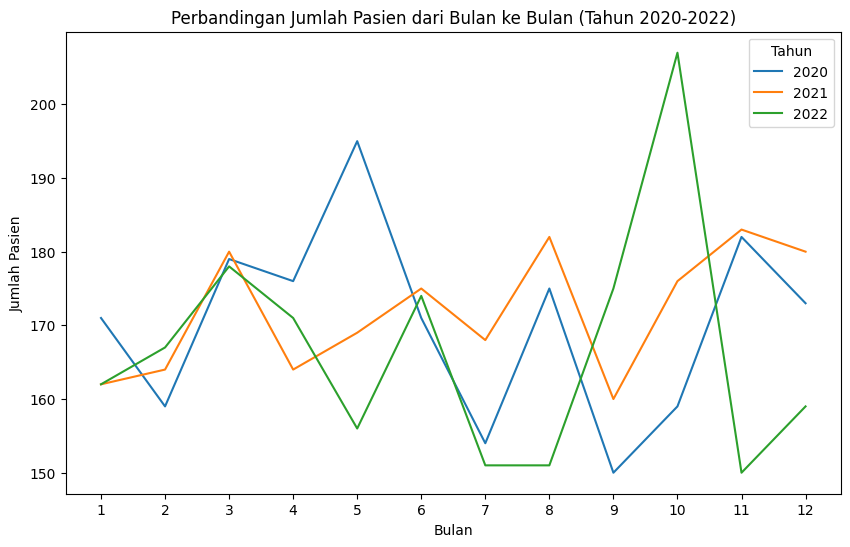

In [ ]:
'''
Line Chart
'''

# Memfilter data hanya untuk tahun 2020, 2021, dan 2022
df_filtered = df[df['Year'].isin([2020, 2021, 2022])]

# Menghitung jumlah pasien dari bulan ke bulan tiap tahun
jumlah_pasien_per_bulan_tahun = df_filtered.groupby(['Year', 'Month']).size().unstack()

# Membuat line chart menggunakan Matplotlib
plt.figure(figsize=(10, 6))

for year in jumlah_pasien_per_bulan_tahun.index:
    plt.plot(jumlah_pasien_per_bulan_tahun.columns, jumlah_pasien_per_bulan_tahun.loc[year], label=year)

plt.title('Perbandingan Jumlah Pasien dari Bulan ke Bulan (Tahun 2020-2022)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pasien')
plt.legend(title='Tahun')
plt.xticks(jumlah_pasien_per_bulan_tahun.columns)
plt.show()

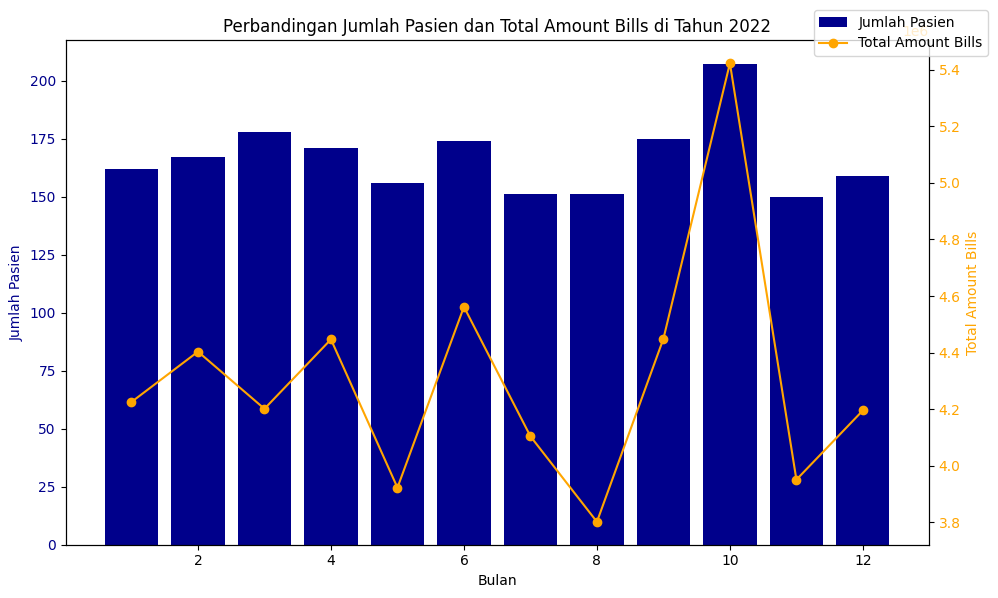

In [ ]:
'''
Combo Chart
'''

# Memfilter data hanya untuk tahun 2022
df_2022 = df[df['Year'] == 2022]

# Menghitung jumlah pasien dan total amount bills per bulan di tahun 2022
jumlah_pasien_per_bulan = df_2022.groupby('Month').size()
total_amount_per_bulan = df_2022.groupby('Month')['Billing Amount'].sum()

# Membuat combo chart menggunakan Matplotlib
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot bar chart untuk jumlah pasien
ax1.bar(jumlah_pasien_per_bulan.index, jumlah_pasien_per_bulan, color='darkblue', label='Jumlah Pasien')
ax1.set_xlabel('Bulan')
ax1.set_ylabel('Jumlah Pasien', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')

# Membuat axis kedua (line chart) untuk total amount bills
ax2 = ax1.twinx()
ax2.plot(total_amount_per_bulan.index, total_amount_per_bulan, color='orange', label='Total Amount Bills', marker='o')
ax2.set_ylabel('Total Amount Bills', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Menambahkan judul dan legenda
plt.title('Perbandingan Jumlah Pasien dan Total Amount Bills di Tahun 2022')
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.show()

## Composition

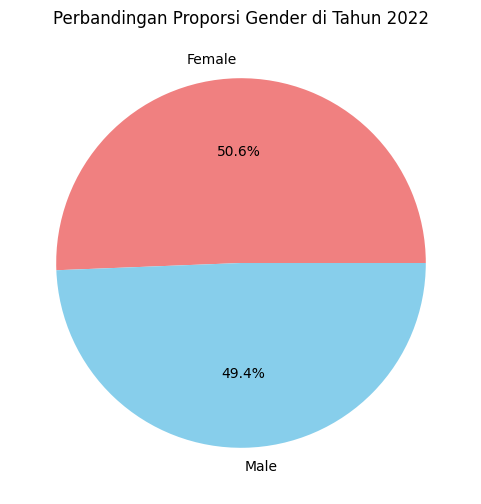

In [ ]:
'''
Pie Chart
'''

# Memfilter data hanya untuk tahun 2022
df_2022 = df[df['Year'] == 2022]

# Menghitung proporsi gender di tahun 2022
proporsi_gender = df_2022['Gender'].value_counts(normalize=True)

# Membuat pie chart menggunakan Matplotlib
plt.figure(figsize=(6, 6))
plt.pie(proporsi_gender, labels=proporsi_gender.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Perbandingan Proporsi Gender di Tahun 2022')
plt.show()

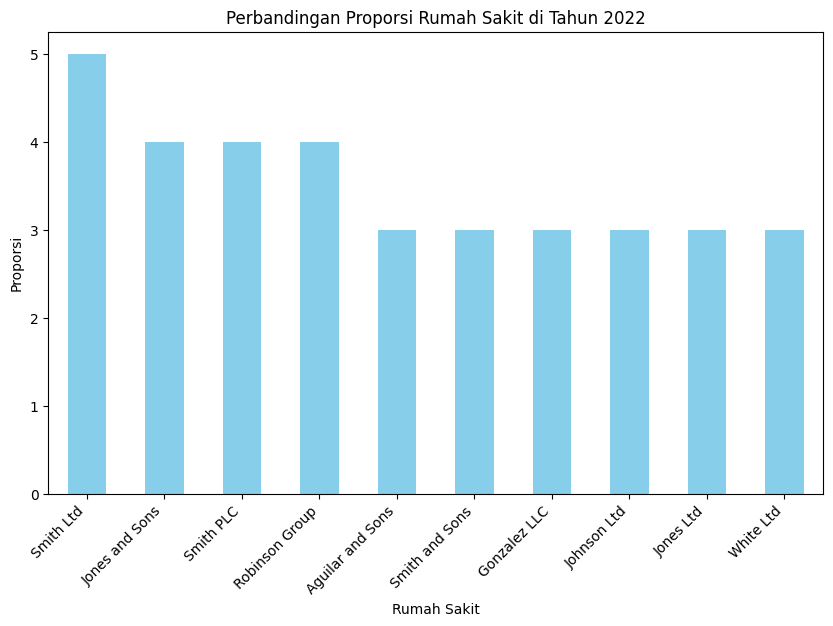

In [ ]:
'''
Bar Chart
'''

# Memfilter data hanya untuk tahun 2022
df_2022 = df[df['Year'] == 2022]

# Menghitung proporsi rumah sakit di tahun 2022
proporsi_rumah_sakit = df_2022['Hospital'].value_counts().head(10)

# Membuat bar chart menggunakan Matplotlib
plt.figure(figsize=(10, 6))
proporsi_rumah_sakit.plot(kind='bar', color='skyblue')
plt.title('Perbandingan Proporsi Rumah Sakit di Tahun 2022')
plt.xlabel('Rumah Sakit')
plt.ylabel('Proporsi')
plt.xticks(rotation=45, ha='right')  # Untuk memudahkan membaca nama rumah sakit
plt.show()

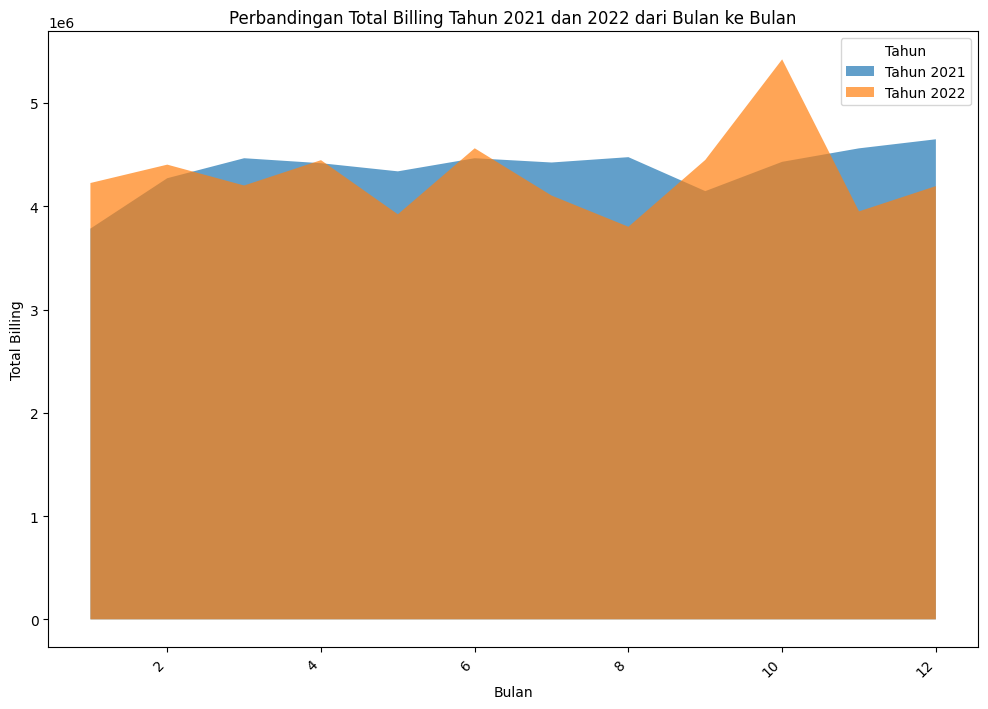

In [ ]:
# Memfilter data hanya untuk tahun 2021 dan 2022
df_filtered = df[df['Year'].isin([2021, 2022])]

# Menghitung total billing setiap tahun per bulan
total_billing_per_year = df_filtered.groupby(['Year', 'Month'])['Billing Amount'].sum().unstack()

# Membuat area chart menggunakan Matplotlib
plt.figure(figsize=(12, 8))

for year in total_billing_per_year.index:
    plt.fill_between(total_billing_per_year.columns, total_billing_per_year.loc[year], label=f'Tahun {year}', alpha=0.7)

plt.title('Perbandingan Total Billing Tahun 2021 dan 2022 dari Bulan ke Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Billing')
plt.legend(title='Tahun', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')

plt.show()

## Distribution

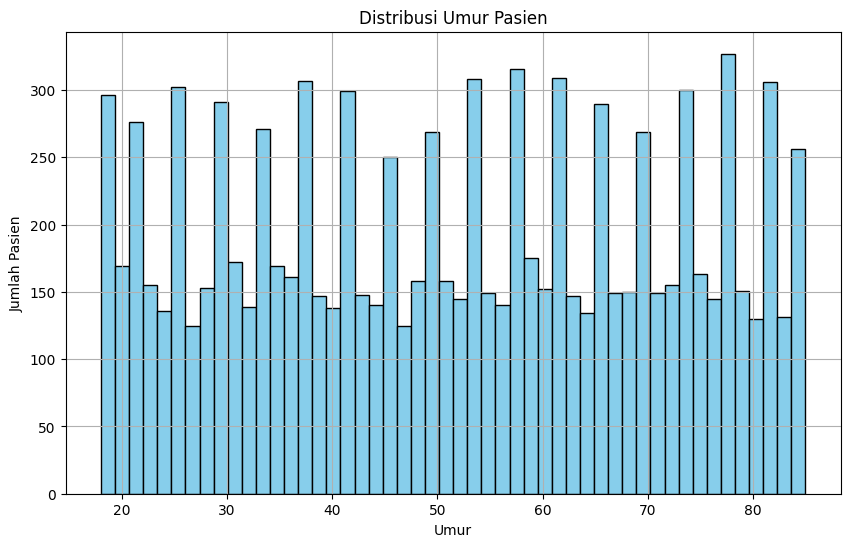

In [ ]:
'''
Histogram
'''

plt.figure(figsize=(10, 6))

plt.hist(df['Age'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribusi Umur Pasien')
plt.xlabel('Umur')
plt.ylabel('Jumlah Pasien')
plt.grid(True)

plt.show()

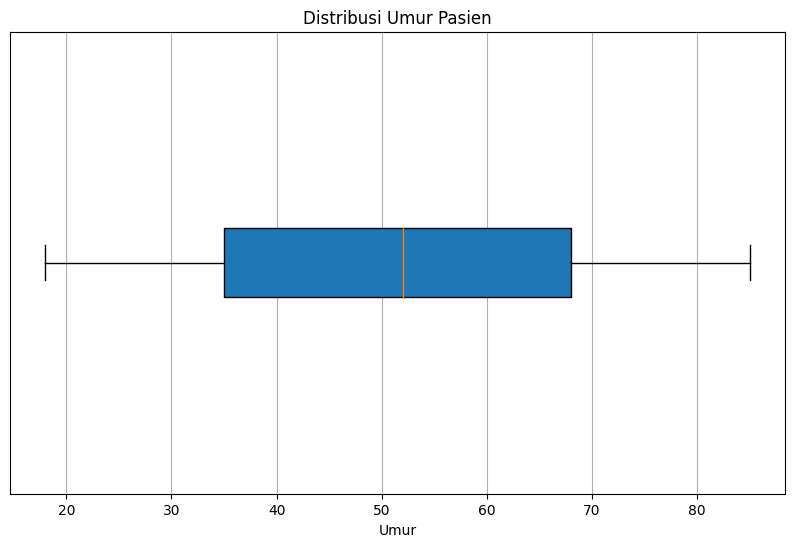

In [ ]:
'''
Box Plot
'''

plt.figure(figsize=(10, 6))

plt.boxplot(df['Age'], vert=False, patch_artist=True)
plt.title('Distribusi Umur Pasien')
plt.xlabel('Umur')
plt.yticks([])
plt.grid(True)

plt.show()

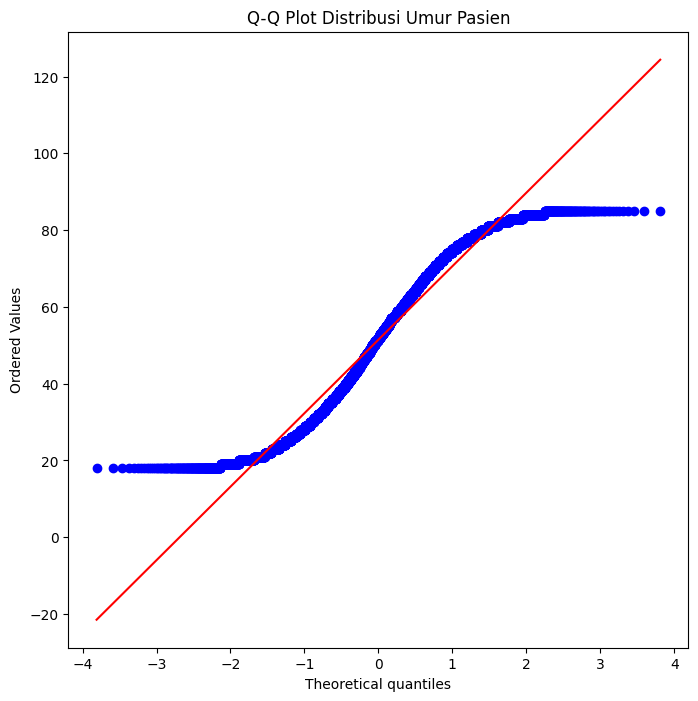

In [ ]:
'''
QQ Plot
'''

import scipy.stats as stats

plt.figure(figsize=(8, 8))

stats.probplot(df['Age'], dist="norm", plot=plt)
plt.title('Q-Q Plot Distribusi Umur Pasien')

plt.show()

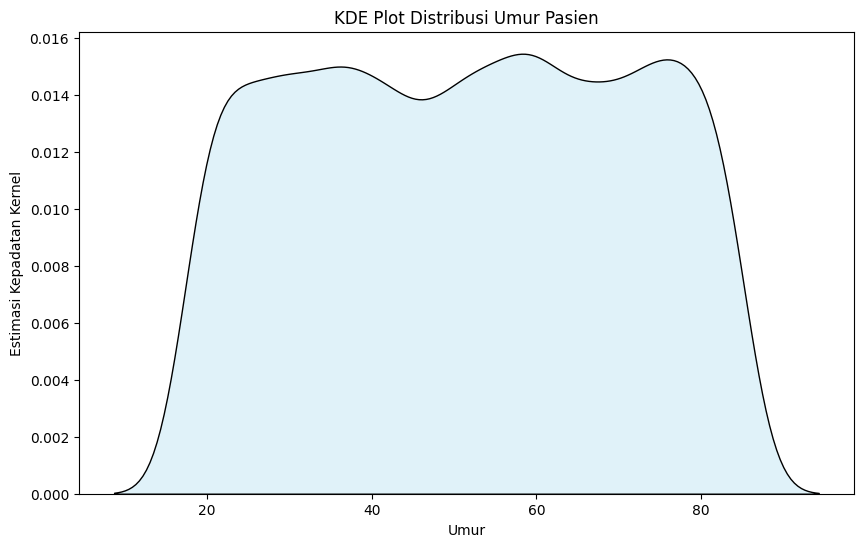

In [ ]:
'''
KDE Plot
'''

plt.figure(figsize=(10, 6))
sns.kdeplot(df['Age'], fill=True, color='skyblue', edgecolor='black')
plt.title('KDE Plot Distribusi Umur Pasien')
plt.xlabel('Umur')
plt.ylabel('Estimasi Kepadatan Kernel')

plt.show()

## Relationship

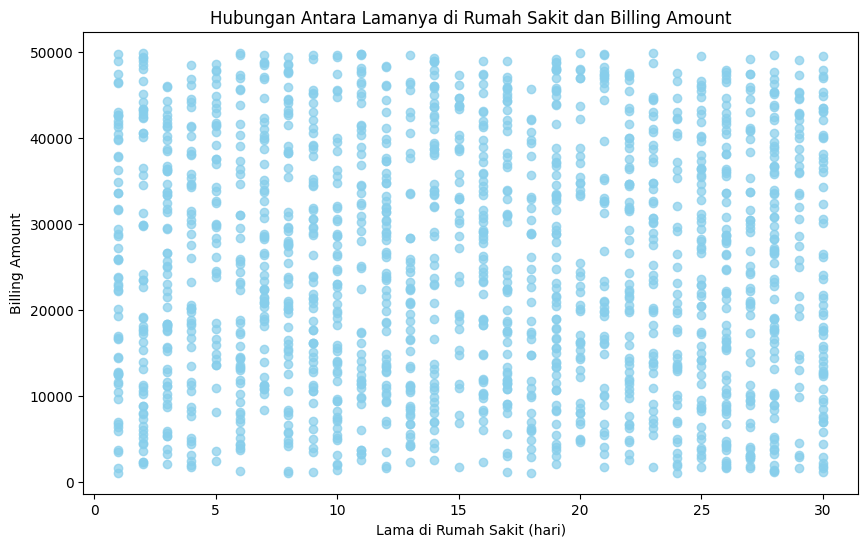

In [ ]:
'''
Scatter Plot
'''

# Menghitung lamanya di rumah sakit (durasi)
df['Duration'] = (pd.to_datetime(df['Discharge Date']) - pd.to_datetime(df['Date of Admission'])).dt.days

df_2023 = df[df['Year'] == 2023]

# Membuat scatter plot menggunakan Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df_2023['Duration'], df_2023['Billing Amount'], color='skyblue', alpha=0.7)
plt.title('Hubungan Antara Lamanya di Rumah Sakit dan Billing Amount')
plt.xlabel('Lama di Rumah Sakit (hari)')
plt.ylabel('Billing Amount')

plt.show()

In [ ]:
df.corr()

<ipython-input-62-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Billing Amount,Room Number,Year,Month,Duration
Age,1.000000,-0.009483,-0.005371,-0.012592,-0.016451,0.009111
Billing Amount,-0.009483,1.000000,-0.006160,-0.000149,0.016656,-0.013507
Room Number,-0.005371,-0.006160,1.000000,0.001798,0.006863,0.009610
Year,-0.012592,-0.000149,0.001798,1.000000,-0.150629,0.003096
Month,-0.016451,0.016656,0.006863,-0.150629,1.000000,-0.005976
Duration,0.009111,-0.013507,0.009610,0.003096,-0.005976,1.000000


> semakin 1 / -1 --> kuat


> semakin 0 --> lemah


> (-) --> berbanding lurus


> (+) --> berbanding terbaik


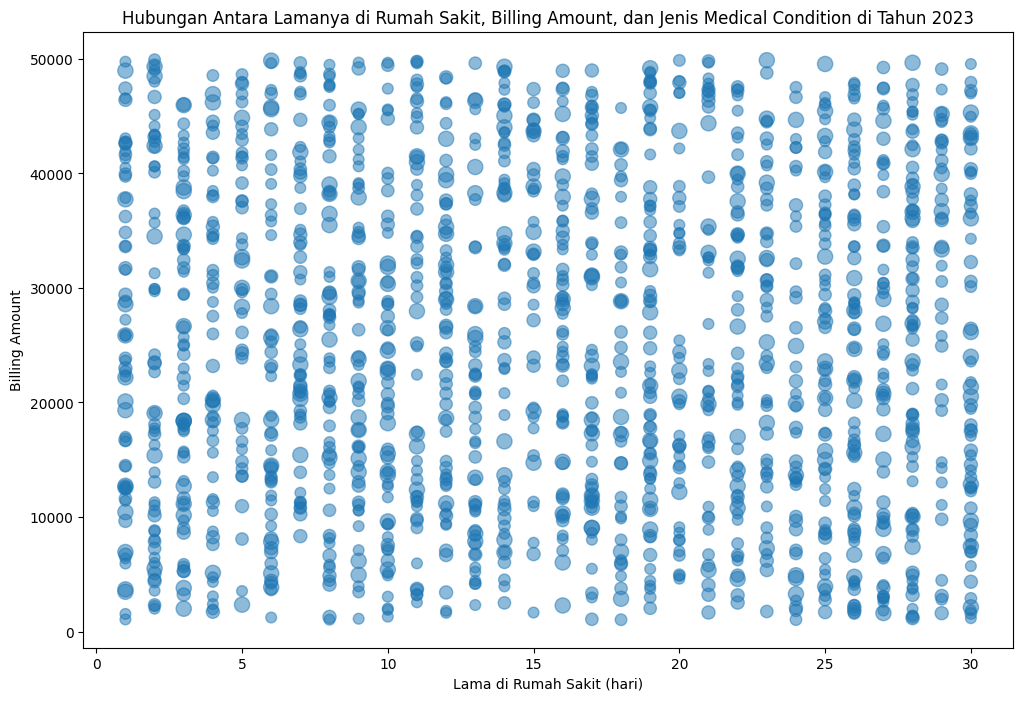

In [ ]:
'''
Bubble Plot
'''

# Membuat bubble plot menggunakan Matplotlib
plt.figure(figsize=(12, 8))

# Menggunakan scatter plot dengan ukuran bulatan (bubble) untuk mewakili jenis kondisi medis
plt.scatter(df_2023['Duration'], df_2023['Billing Amount'], s=df_2023['Medical Condition'].map(len) * 10, alpha=0.5)

plt.title('Hubungan Antara Lamanya di Rumah Sakit, Billing Amount, dan Jenis Medical Condition di Tahun 2023')
plt.xlabel('Lama di Rumah Sakit (hari)')
plt.ylabel('Billing Amount')

plt.show()

# Hands-On

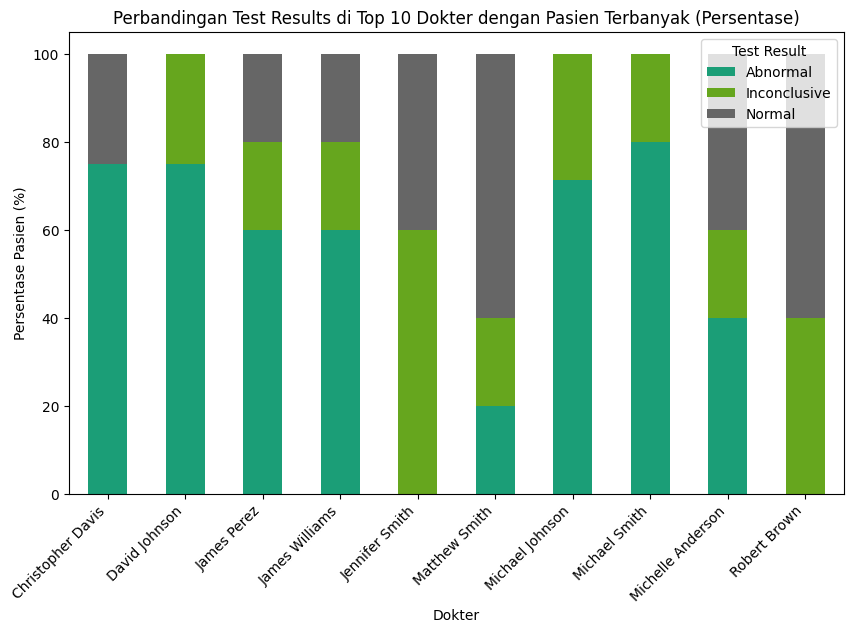

In [ ]:
'''
Mengetahui proporsi Test Results pasien yang ditangani oleh 10 Doctor dengan pasien terbanyak

Tipe visualisasi: Stacked Bar Chart
Alasan: Perbandingan proporsi antara 2 variabel kategorikal
Interpretasi:

'''

# Menghitung jumlah pasien di setiap dokter
jumlah_pasien_per_doktor = df['Doctor'].value_counts()

# Memilih top 10 dokter dengan pasien terbanyak
top_dokter = jumlah_pasien_per_doktor.head(10)

# df top 10 dokter
df_top10 = df[df['Doctor'].isin(top_dokter.index)]

# jumlah pasien per Test Results
jumlah_pasien_per_result = df_top10.groupby(['Doctor', 'Test Results']).size().unstack()

# Menghitung total pasien per rumah sakit
total_pasien_per_dokter = df_top10.groupby('Doctor')['Test Results'].count()

# Menghitung persentase pasien per test results di setiap rumah sakit
persentase_pasien_per_result = (jumlah_pasien_per_result.T / total_pasien_per_dokter * 100).T

# Membuat stacked bar plot menggunakan .plot
persentase_pasien_per_result.plot(kind='bar', stacked=True, colormap='Dark2', figsize=(10, 6))
plt.title('Perbandingan Test Results di Top 10 Dokter dengan Pasien Terbanyak (Persentase)')
plt.xlabel('Dokter')
plt.ylabel('Persentase Pasien (%)')
plt.legend(title='Test Result', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
persentase_pasien_per_result

Test Results,Abnormal,Inconclusive,Normal
Doctor,,,
Christopher Davis,75.000000,NaN,25.0
David Johnson,75.000000,25.000000,NaN
James Perez,60.000000,20.000000,20.0
James Williams,60.000000,20.000000,20.0
Jennifer Smith,NaN,60.000000,40.0
Matthew Smith,20.000000,20.000000,60.0
Michael Johnson,71.428571,28.571429,NaN
Michael Smith,80.000000,20.000000,NaN
Michelle Anderson,40.000000,20.000000,40.0


In [ ]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Year', 'Month', 'Duration'],
      dtype='object')

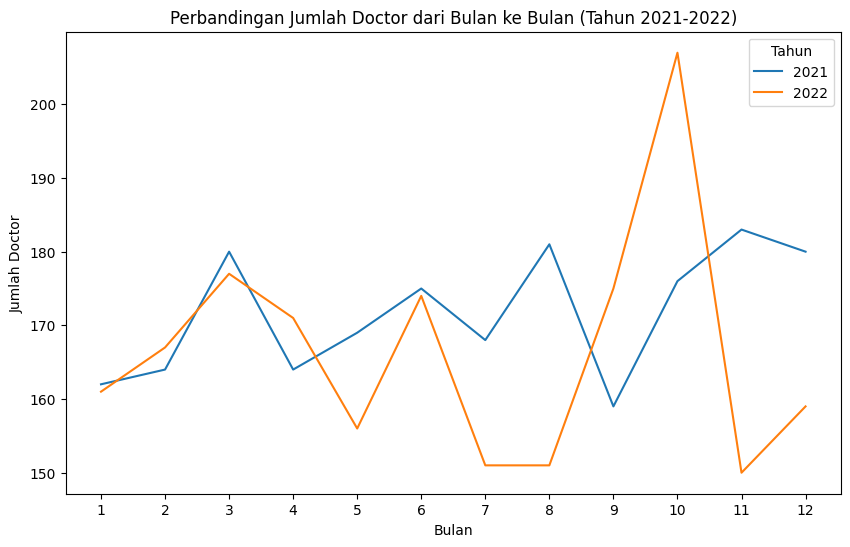

In [ ]:
'''
Mengetahui perbandingan jumlah Doctor dari bulan ke bulan antara tahun 2021 dan 2022

Tipe visualisasi: Line Chart
Alasan: Melihat tren berdasarkan waktu
Interpretasi:

'''

# Memfilter data hanya untuk tahun 2021 dan 2022
df_filtered = df[df['Year'].isin([2021, 2022])]

# Menghitung jumlah Doctor dari bulan ke bulan tiap tahun
jumlah_doctor_per_bulan_tahun = df_filtered.groupby(['Year', 'Month'])['Doctor'].nunique().unstack()

# Membuat line chart menggunakan Matplotlib
plt.figure(figsize=(10, 6))

for year in jumlah_doctor_per_bulan_tahun.index:
    plt.plot(jumlah_doctor_per_bulan_tahun.columns, jumlah_doctor_per_bulan_tahun.loc[year], label=year)

plt.title('Perbandingan Jumlah Doctor dari Bulan ke Bulan (Tahun 2021-2022)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Doctor')
plt.legend(title='Tahun')
plt.xticks(jumlah_doctor_per_bulan_tahun.columns)
plt.show()

In [ ]:
jumlah_doctor_per_bulan_tahun

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2021,162,164,180,164,169,175,168,181,159,176,183,180
2022,161,167,177,171,156,174,151,151,175,207,150,159


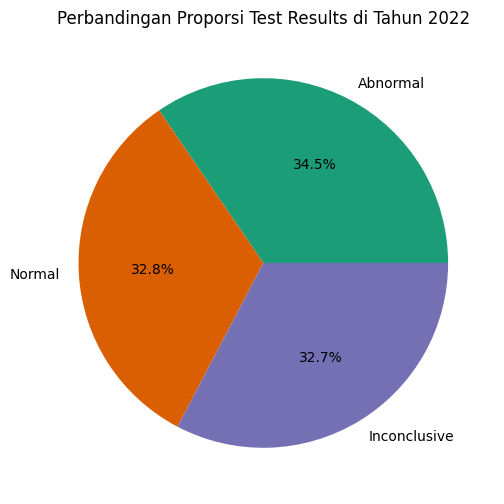

In [ ]:
'''
Mengetahui proporsi Test Result di tahun 2022

Tipe visualisasi: Pie Chart
Alasan: Proporsi 1 variabel
Interpretasi:

'''

# Memfilter data hanya untuk tahun 2022
df_2022 = df[df['Year'] == 2022]

# Menghitung proporsi Test Result di tahun 2022
proporsi_result = df_2022['Test Results'].value_counts(normalize=True)

# Membuat pie chart menggunakan Matplotlib
plt.figure(figsize=(6, 6))
plt.pie(proporsi_result, labels=proporsi_result.index, autopct='%1.1f%%', colors=plt.cm.Dark2.colors)
plt.title('Perbandingan Proporsi Test Results di Tahun 2022')
plt.show()

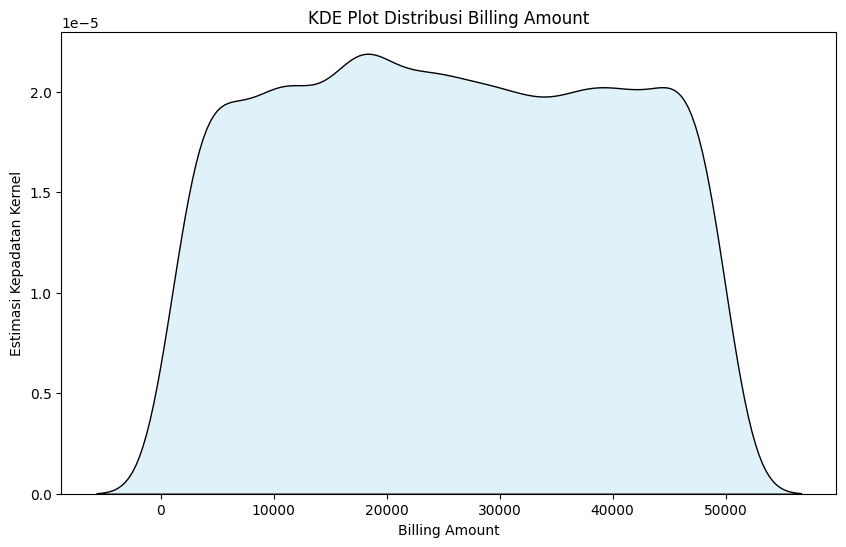

In [ ]:
'''
Mengetahui distribusi Billing Amount di tahun 2023

Tipe visualisasi: KDE
Alasan: variabel kontinu
Interpretasi:

'''

plt.figure(figsize=(10, 6))
sns.kdeplot(df['Billing Amount'], fill=True, color='skyblue', edgecolor='black')
plt.title('KDE Plot Distribusi Billing Amount')
plt.xlabel('Billing Amount')
plt.ylabel('Estimasi Kepadatan Kernel')

plt.show()

In [ ]:
df_top_10 = df.groupby('Hospital').sum().sort_values('Billing Amount', ascending=False).head(10)
df_top_10

<ipython-input-106-b35251f00cf5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_top_10 = df.groupby('Hospital').sum().sort_values('Billing Amount', ascending=False).head(10)


,Age,Billing Amount,Room Number,Year,Month,Duration
Hospital,,,,,,
Smith and Sons,973,477638.881124,5170,34351,98,338
Smith PLC,921,432283.548554,5104,38402,129,303
Smith Ltd,680,428163.073062,4360,28292,95,164
Smith Inc,699,351463.888372,3788,28289,81,238
Williams LLC,617,327522.472644,4374,24249,75,193
Thomas Group,615,327045.374505,3427,22221,100,186
Johnson Ltd,518,305971.192470,3925,22224,65,145
Davis and Sons,408,293452.520353,2600,18182,57,103
Jones Inc,456,290351.193848,3070,18187,64,141


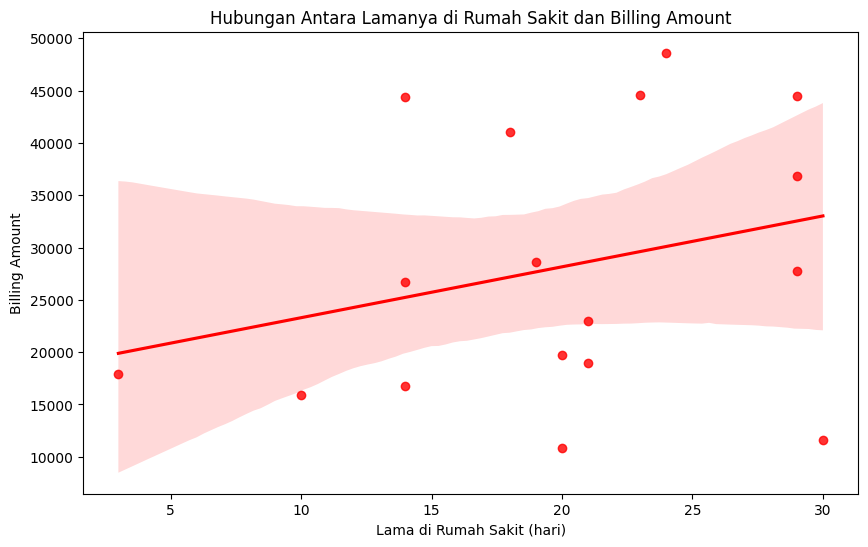

In [ ]:
'''
Mengetahui hubungan antara Duration di rumah sakit dengan Billing Amount, di Hospital dengan Billing Amount paling tinggi

Tipe visualisasi: Scatter Plot
Alasan: Hubungan antara 2 variabel
Interpretasi:

'''

df['Duration'] = (pd.to_datetime(df['Discharge Date']) - pd.to_datetime(df['Date of Admission'])).dt.days

df_smith = df[df['Hospital'] == 'Smith and Sons']

# Membuat scatter plot menggunakan Matplotlib
plt.figure(figsize=(10, 6))
sns.regplot(x='Duration', y='Billing Amount', data=df_smith, color='red')
plt.title('Hubungan Antara Lamanya di Rumah Sakit dan Billing Amount')
plt.xlabel('Lama di Rumah Sakit (hari)')
plt.ylabel('Billing Amount')

plt.show()

In [ ]:
df_smith.corr()

<ipython-input-112-fa99b9dcd02b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_smith.corr()


,Age,Billing Amount,Room Number,Year,Month,Duration
Age,1.000000,-0.219670,-0.361914,0.141497,-0.186816,-0.328098
Billing Amount,-0.219670,1.000000,0.022109,0.148588,-0.327168,0.281511
Room Number,-0.361914,0.022109,1.000000,0.081719,0.321606,0.054167
Year,0.141497,0.148588,0.081719,1.000000,-0.509623,0.006471
Month,-0.186816,-0.327168,0.321606,-0.509623,1.000000,0.088898
Duration,-0.328098,0.281511,0.054167,0.006471,0.088898,1.000000
